# LOAN AUTHORIZATION PREDICTOR


SUMMARY OF PROBLEM STATEMENT : 
GIVE ME SOME CREDIT

In this model,we have to predict whether to sanction loan of a particular company/person based on their previous records and details

APPLICATIONS OF PROJECT:

1. It could be used by banks to grant loans to customers who fall under their criteria. 
2. Industries can use these deductions made by model to get data like debt ratio,etc for granting loans. 

STEP BY STEP APPROACH:

1. Studied dataset and its related attributes and parameters.
2. Removed all useless,redundunt and unrelated attributes in the project i.e. Performed Data Cleaning.
3. Seperated the test and training data.
4. Created the graphs to better understand the attributes of the dataset and correlation as well.
5. Tried to get the best algorithm by comparing their efficiency and also performed pipelining for scaled algorithms.
6. Created the model which had best efficiency and trained the model using the training dataset.
7. After getting the prediction results, we tested the model using testing dataset.
8. We compared the prediction results of training and testing data to check the accuracy of the model. 

ALGORITHMS USED: 

Classification algorithms -
1. 'LR', LogisticRegression() 
2. 'LDA', LinearDiscriminantAnalysis() 
3. 'KNN', KNeighborsClassifier() 
4. 'CART', DecisionTreeClassifier()  
5. 'NB', GaussianNB() 

PACKAGES/MODULES USED:

1. NumPy 
2. Pandas
3. MatplotLib
4. Seaborn
5. Sklearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Operation on Train Data(Data Cleaning) 

In [5]:
Credit_tr = pd.read_csv('cs-training.csv')

In [6]:
Credit_tr.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
Credit_tr.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


######  Data Contained Null Values so, dropping NaN's

In [8]:
Credit_tr.dropna(inplace=True)

In [9]:
Credit_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              120269 non-null int64
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null float64
dtypes: float64(4), int64(8)
memory usage: 11.9 MB


###### Bank can Grant Loan To a Person who has Age Above 18,and usually perosn before his Retirement
###### so adding  a age restriction to data

In [10]:
indexNames = Credit_tr[Credit_tr['age'] < 18].index
Credit_tr.drop(index=indexNames , inplace=True)
indexNames = Credit_tr[Credit_tr['age'] > 60].index
Credit_tr.drop(index=indexNames , inplace=True)

In [11]:
Credit_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87554 entries, 0 to 149998
Data columns (total 12 columns):
Unnamed: 0                              87554 non-null int64
SeriousDlqin2yrs                        87554 non-null int64
RevolvingUtilizationOfUnsecuredLines    87554 non-null float64
age                                     87554 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    87554 non-null int64
DebtRatio                               87554 non-null float64
MonthlyIncome                           87554 non-null float64
NumberOfOpenCreditLinesAndLoans         87554 non-null int64
NumberOfTimes90DaysLate                 87554 non-null int64
NumberRealEstateLoansOrLines            87554 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    87554 non-null int64
NumberOfDependents                      87554 non-null float64
dtypes: float64(4), int64(8)
memory usage: 8.7 MB


Comparing Relationship of Output with each data column 

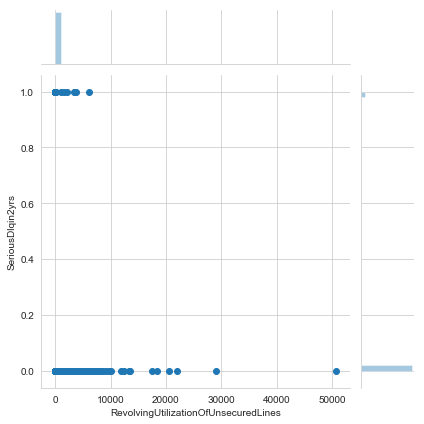

In [12]:
sns.set_style("whitegrid")
sns.jointplot(x='RevolvingUtilizationOfUnsecuredLines',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

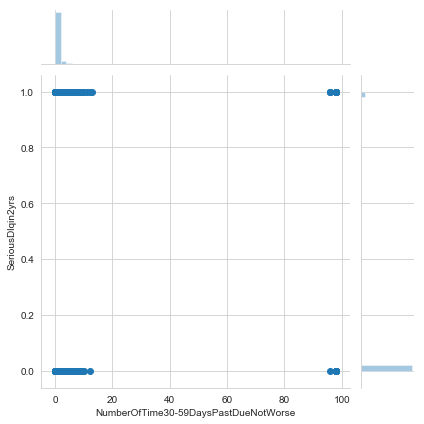

In [13]:
sns.set_style("whitegrid")
sns.jointplot(x='NumberOfTime30-59DaysPastDueNotWorse',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

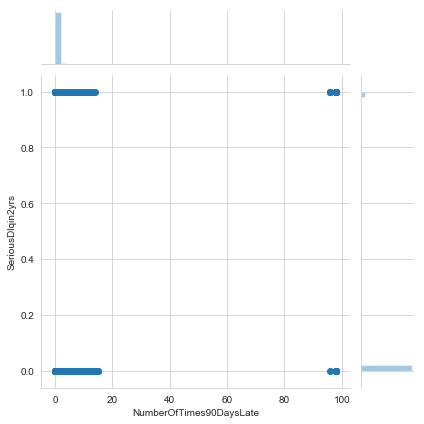

In [14]:
sns.jointplot(x='NumberOfTimes90DaysLate',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

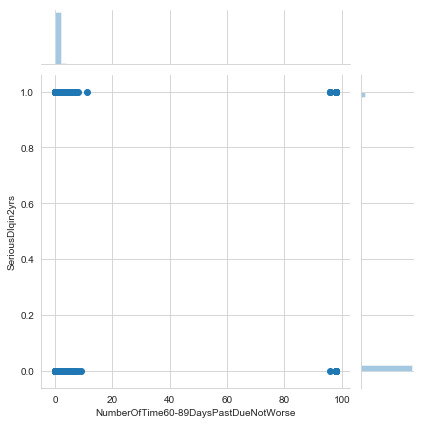

In [15]:
sns.jointplot(x='NumberOfTime60-89DaysPastDueNotWorse',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

###### Relation of  'NumberOfTimes90DaysLate' and 'NumberOfTime30-59DaysPastDueNotWorse' with the output is Similar
So Dropping one of this column

In [16]:
Credit_tr.drop('NumberOfTimes90DaysLate',axis=1,inplace=True)

In [17]:
Credit_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87554 entries, 0 to 149998
Data columns (total 11 columns):
Unnamed: 0                              87554 non-null int64
SeriousDlqin2yrs                        87554 non-null int64
RevolvingUtilizationOfUnsecuredLines    87554 non-null float64
age                                     87554 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    87554 non-null int64
DebtRatio                               87554 non-null float64
MonthlyIncome                           87554 non-null float64
NumberOfOpenCreditLinesAndLoans         87554 non-null int64
NumberRealEstateLoansOrLines            87554 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    87554 non-null int64
NumberOfDependents                      87554 non-null float64
dtypes: float64(4), int64(7)
memory usage: 8.0 MB


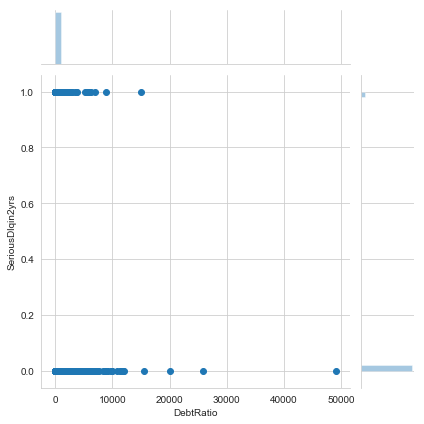

In [18]:
sns.jointplot(x='DebtRatio',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

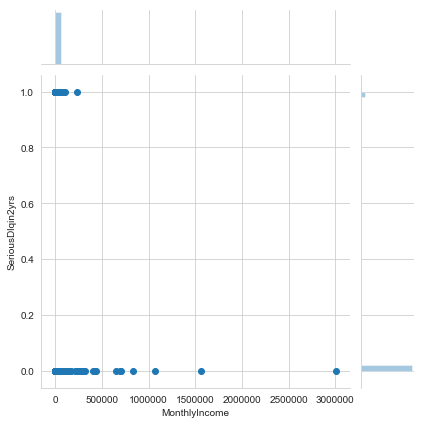

In [19]:
sns.jointplot(x='MonthlyIncome',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

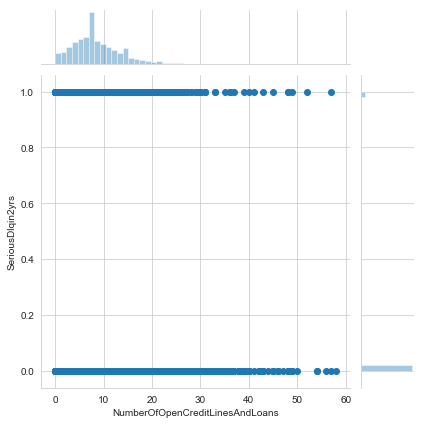

In [20]:
sns.jointplot(x='NumberOfOpenCreditLinesAndLoans',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

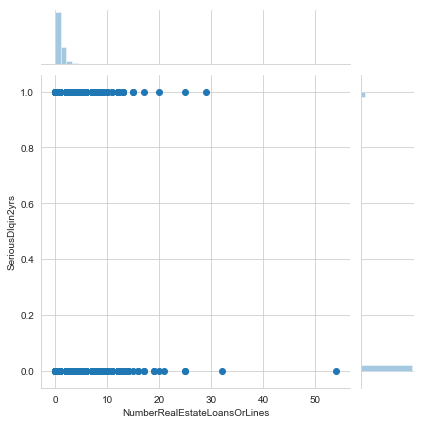

In [21]:
sns.jointplot(x='NumberRealEstateLoansOrLines',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

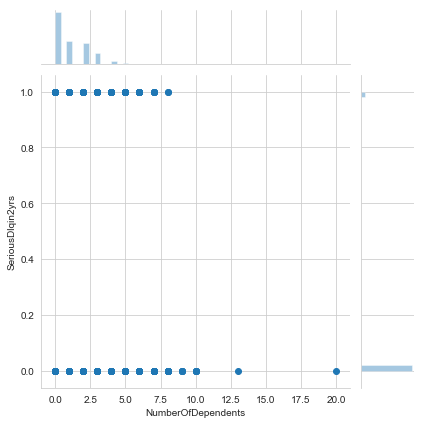

In [22]:
sns.jointplot(x='NumberOfDependents',y='SeriousDlqin2yrs',data=Credit_tr,kind='scatter')

###### No Of Dependents had no serious relation with the outcome so we drop it

In [23]:
Credit_tr.drop('NumberOfDependents',axis=1,inplace=True)

In [24]:
Credit_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87554 entries, 0 to 149998
Data columns (total 10 columns):
Unnamed: 0                              87554 non-null int64
SeriousDlqin2yrs                        87554 non-null int64
RevolvingUtilizationOfUnsecuredLines    87554 non-null float64
age                                     87554 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    87554 non-null int64
DebtRatio                               87554 non-null float64
MonthlyIncome                           87554 non-null float64
NumberOfOpenCreditLinesAndLoans         87554 non-null int64
NumberRealEstateLoansOrLines            87554 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    87554 non-null int64
dtypes: float64(3), int64(7)
memory usage: 7.3 MB


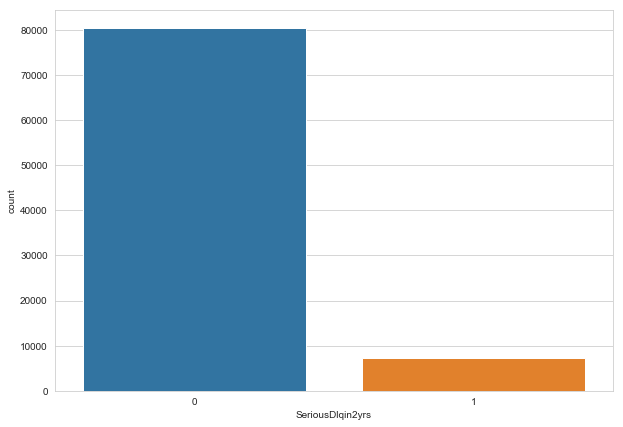

In [26]:
plt.figure(figsize=(10,7))
sns.countplot('SeriousDlqin2yrs', data=Credit_tr)

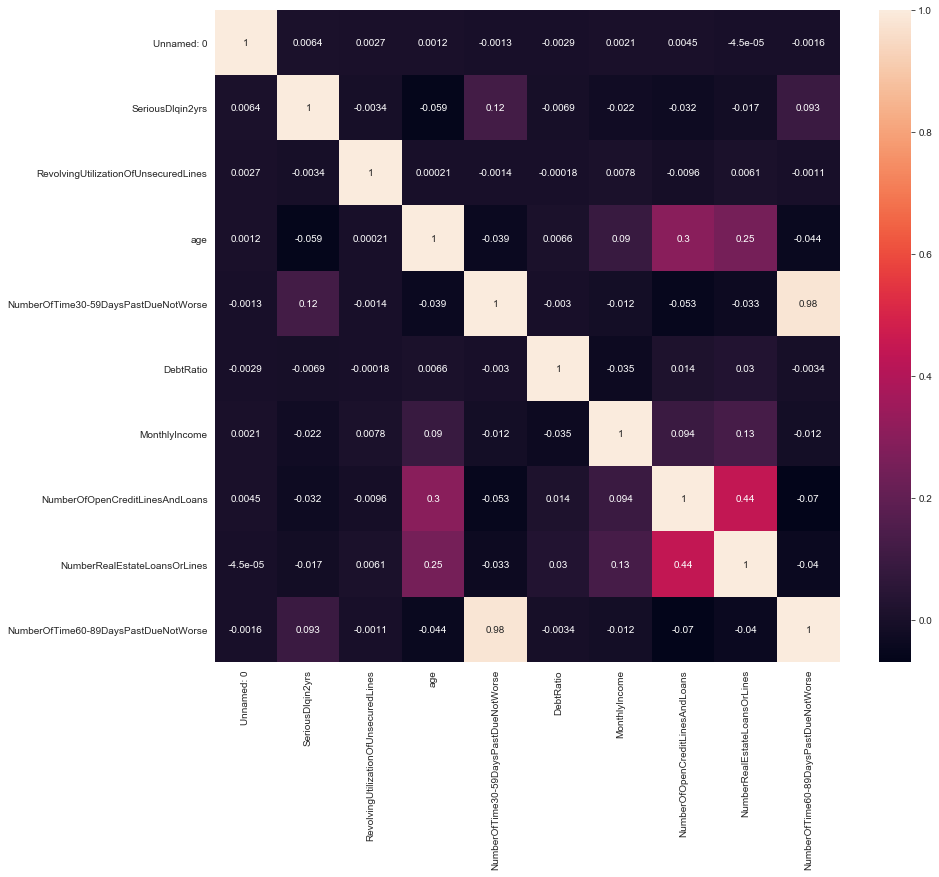

In [27]:
corr = Credit_tr.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

# Model Selection 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = Credit_tr.drop('SeriousDlqin2yrs', axis=1)
Y = Credit_tr['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=101)

In [30]:
# Model Selection packages
from sklearn import model_selection
from sklearn.pipeline import Pipeline

# Data Scaling Packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Accuracy Testing Packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model Selection By testing CV score of each Algorithm 

In [31]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
n_splits = 5

for name, model in models:
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, \
                                  random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, \
                                                 y_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR: 91.77 ( 0.16)
LDA: 91.68 ( 0.18)
KNN: 91.30 ( 0.16)
CART: 86.89 ( 0.17)
NB: 91.74 ( 0.20)


In [33]:
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df

,CV1,CV2,CV3,CV4,CV5
LR,0.917034,0.917034,0.917680,0.920862,0.916130
LDA,0.916136,0.916381,0.915477,0.920454,0.915640
KNN,0.911160,0.912465,0.912866,0.915885,0.912540
CART,0.868168,0.867841,0.869789,0.871747,0.866852
NB,0.916952,0.915239,0.917761,0.921025,0.916130


In [34]:
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)

In [35]:
pd.set_option('precision',2)
results_df*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LR,91.70,91.70,91.77,92.09,91.61,91.77,0.18
LDA,91.61,91.64,91.55,92.05,91.56,91.68,0.21
KNN,91.12,91.25,91.29,91.59,91.25,91.30,0.17
CART,86.82,86.78,86.98,87.17,86.69,86.89,0.19
NB,91.70,91.52,91.78,92.10,91.61,91.74,0.22


#### Checking Accuracy Of Algorithms using Scaled Data Inputs

In [36]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
results = []
names = []

for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 w

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLR,91.71,91.65,91.78,92.09,91.68,91.78,0.18
ScaledLDA,91.61,91.64,91.55,92.05,91.56,91.68,0.21
ScaledNB,91.50,91.25,91.56,91.96,91.51,91.55,0.26
ScaledKNN,91.55,91.28,91.47,91.95,91.33,91.51,0.27
ScaledCART,87.03,86.73,86.69,87.47,86.81,86.95,0.32


### As Most Accuracy of 91.78 +- .18 was achieved by Logestic Regression()
#### Selecting LR() for Training and Testing Purposes 

# Preparing and Training the Model 

In [38]:
model = LogisticRegression()

In [39]:
# Training the model
model.fit(X_train,y_train)

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Testing the Model

In [40]:
predictions = model.predict(X_train)

In [42]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56243
           1       0.54      0.01      0.02      5044

   micro avg       0.92      0.92      0.92     61287
   macro avg       0.73      0.50      0.49     61287
weighted avg       0.89      0.92      0.88     61287



In [43]:
matrix = confusion_matrix(y_train,predictions)
print(matrix)

[[56204    39]
 [ 4999    45]]


Here the first column in the confusion matrix indicates the no. of correct predictions and the second column indicates that the no. of incorrect predictions.

In [44]:
model.score(X_train, y_train)

0.9177965963418017

In [45]:
df = pd.DataFrame(y_train)
df['Predicted'] = predictions

In [46]:
df.head()

,SeriousDlqin2yrs,Predicted
74367,0,0
61936,0,0
4989,0,0
75989,0,0
75349,0,0


### Hence Accuracy of our model was 91.77% ...